### Problem Statement:

On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile. In this problem we do not have to predict actual price but a price range indicating how high the price is

<img src="https://www.goodtimenation.com/wp-content/uploads/2019/04/Dent-Price-Prediction.jpeg">

### Data Description

1.  id:ID
2.  battery_power:Total energy a battery can store in one time measured in mAh
3.  blue:Has bluetooth or not
4.  clock_speed:speed at which microprocessor executes instructions
5.  dual_sim:Has dual sim support or not
6.  fc:Front Camera mega pixels
7.  four_g:Has 4G or not
8.  int_memory:Internal Memory in Gigabytes
9.  m_dep:Mobile Depth in cm
10. mobile_wt:Weight of mobile phone
11. n_cores:Number of cores of processor
12. pc:Primary Camera mega pixels
13. px_height:Pixel Resolution Height
14. px_width:Pixel Resolution Width
15. ram:Random Access Memory in Megabytes
16. sc_h:Screen Height of mobile in cm
17. sc_w:Screen Width of mobile in cm
18. talk_time:longest time that a single battery charge will last when you are
19. three_g:Has 3G or not
20. touch_screen:Has touch screen or not
21. wifi:Has wifi or not

#### Steps involved in this notebook
1. Loading data 
2. Understanding the data
3. Storing the target variable
4. Splitting into train and validation
5. KNN Model Building:
      1. With Parameters
      2. Without Parameters

### Loading the libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

### Loading data

In [2]:
train = pd.read_csv("train_data.csv")

In [3]:
train.shape

(1400, 22)

In [4]:
train.head()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,807,1,0.5,1,0,0,37,0.2,127,...,245,829,2319,5,4,4,0,0,0,1
1,2,1065,1,0.5,0,0,1,14,0.7,89,...,188,928,3078,10,1,18,1,0,1,2
2,3,1171,1,1.7,1,2,0,19,0.3,167,...,248,755,263,6,5,8,0,0,0,0
3,4,609,1,3.0,0,15,1,44,0.3,117,...,58,1253,2581,15,11,15,1,0,1,1
4,5,1193,1,2.3,0,7,0,20,1.0,158,...,1442,1904,1958,7,5,2,1,0,0,2


### Statistical Summary

In [5]:
train.describe()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1400.0000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,700.5000,1237.027143,0.499286,1.526071,0.505714,4.215000,0.515714,32.147143,0.505143,140.125714,...,652.376429,1244.966429,2122.869286,12.294286,5.787143,10.972143,0.756429,0.503571,0.512143,1.500000
std,404.2895,440.555073,0.500178,0.824300,0.500146,4.251417,0.499932,18.209559,0.290107,35.361221,...,447.273563,428.168423,1087.155644,4.160191,4.376048,5.546213,0.429390,0.500166,0.500031,1.118434
min,1.0000,502.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,350.7500,842.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,...,283.750000,874.000000,1205.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,700.5000,1222.500000,0.000000,1.500000,1.000000,3.000000,1.000000,31.000000,0.500000,141.000000,...,576.000000,1247.000000,2127.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1050.2500,1615.000000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,...,958.500000,1613.000000,3049.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1400.0000,1998.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 22 columns):
id               1400 non-null int64
battery_power    1400 non-null int64
bluetooth        1400 non-null int64
clock_speed      1400 non-null float64
dual_sim         1400 non-null int64
fc               1400 non-null int64
four_g           1400 non-null int64
int_memory       1400 non-null int64
m_dep            1400 non-null float64
mobile_wt        1400 non-null int64
n_cores          1400 non-null int64
pc               1400 non-null int64
px_height        1400 non-null int64
px_width         1400 non-null int64
ram              1400 non-null int64
sc_h             1400 non-null int64
sc_w             1400 non-null int64
talk_time        1400 non-null int64
three_g          1400 non-null int64
touch_screen     1400 non-null int64
wifi             1400 non-null int64
price_range      1400 non-null int64
dtypes: float64(2), int64(20)
memory usage: 240.7 KB


### Storing the target variable 

In [7]:
x_train=train.drop(columns=['price_range'],axis=1)
y_train=train[['price_range']]

In [8]:
x_train.head()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,807,1,0.5,1,0,0,37,0.2,127,...,0,245,829,2319,5,4,4,0,0,0
1,2,1065,1,0.5,0,0,1,14,0.7,89,...,2,188,928,3078,10,1,18,1,0,1
2,3,1171,1,1.7,1,2,0,19,0.3,167,...,19,248,755,263,6,5,8,0,0,0
3,4,609,1,3.0,0,15,1,44,0.3,117,...,16,58,1253,2581,15,11,15,1,0,1
4,5,1193,1,2.3,0,7,0,20,1.0,158,...,13,1442,1904,1958,7,5,2,1,0,0


In [9]:
y_train.head()

,price_range
0,1
1,2
2,0
3,1
4,2


### Train - Test Split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.20)

In [11]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1120, 21)
(280, 21)
(1120, 1)
(280, 1)


## KNN Model 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

### Using Hyperparameters

In [13]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,Y_train)

In [14]:
clf.best_score_

0.9116071428571428

In [20]:
from sklearn.model_selection import learning_curve

In [21]:
def plot_curve():
    # instantiate
    model = KNeighborsClassifier()
    model.fit(X_train,Y_train)
    train_sizes, train_scores, test_scores = learning_curve(clf, X_train,Y_train, n_jobs=-1,train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("LogisticRegression")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

No handles with labels found to put in legend.


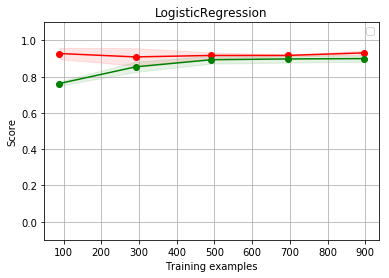

In [22]:
%matplotlib inline
plot_curve()

### Without Parameters

In [15]:
model = KNeighborsClassifier()
model.fit(X_train,Y_train)
trainy_pred = model.predict(X_train)
testy_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(trainy_pred,Y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(testy_pred,Y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(testy_pred,Y_test))
print("\nClassificationReport:\n%s"%classification_report(testy_pred,Y_test))

Train Set Accuracy:94.19642857142857
Test Set Accuracy:88.57142857142857

Confusion Matrix:
[[68  6  0  0]
 [ 4 57 10  0]
 [ 0  3 54  6]
 [ 0  0  3 69]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        74
           1       0.86      0.80      0.83        71
           2       0.81      0.86      0.83        63
           3       0.92      0.96      0.94        72

    accuracy                           0.89       280
   macro avg       0.88      0.88      0.88       280
weighted avg       0.89      0.89      0.89       280



In [17]:
from sklearn.model_selection import learning_curve

In [18]:
def plot_curve():
    # instantiate
    model = KNeighborsClassifier()
    model.fit(X_train,Y_train)
    train_sizes, train_scores, test_scores = learning_curve(model, X_train,Y_train, n_jobs=-1,train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("LogisticRegression")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

No handles with labels found to put in legend.


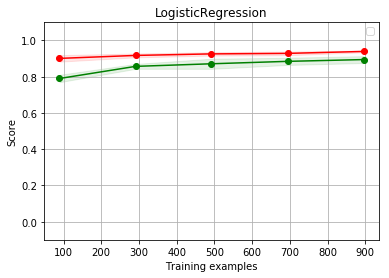

In [19]:
%matplotlib inline
plot_curve()